# Data Analysis and Visualization

This phase aims to analyze and visualize the data to provide meaningful insights.

### Objectives
1. Perform basic analysis
2. Perform exploratory data analysis
3. Perform classical analysis
4. Perform regression analysis

In [1]:
# necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
!pip install squarify

In [21]:
import squarify

In [2]:
data = pd.read_csv('../Data/train.csv')
data.shape

(381109, 12)

The data contains `381109` rows and `12` columns

In [3]:
data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 30.5+ MB


**Observations**

- There are no missing values in the dataset

In [5]:
license_dict = {0: "No License", 1: "Has License"}
insured_dict = {0: "No", 1: "Yes"}
response_dict = {0: "Not interested", 1: "Interested"}

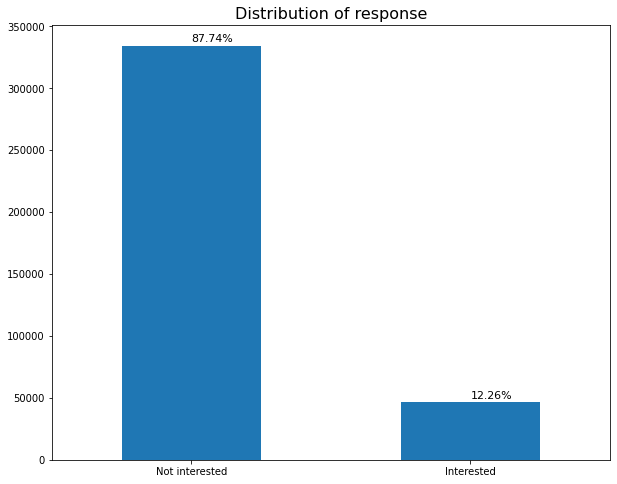

In [6]:
# visualization for distribution of the reponse
labels_pct = (data['Response'].value_counts(normalize=True) * 100).tolist() # normalize the value counts to percentage
labels = data['Response'].value_counts().tolist()

labels_dict = {'Interested': str(round(labels_pct[0],2)) + '%',
               'Not Interested': str(round(labels_pct[1], 2)) + '%'
              }

fig, ax = plt.subplots(1, 1, figsize=(10, 8))
data['Response'].value_counts().plot(kind='bar')
plt.text(0, labels[0] + 3000, labels_dict['Interested'], fontsize=11)
plt.text(1, labels[1] + 3000, labels_dict['Not Interested'], fontsize=11)
ax.set_xticklabels([response_dict[0], response_dict[1]])
plt.xticks(rotation=0)
plt.title('Distribution of response', fontsize=16)
fig.savefig('plots/response_distr.jpeg', dpi=82)
plt.show()

**Observation**
- The dataset is imbalanced, only 12.26% of all `policy holders` that had a health insurance were interested in vehicle insurance.

In [10]:
contigency_pct = pd.crosstab(data['Response'], data['Vehicle_Damage'])
contigency_pct

Vehicle_Damage,No,Yes
Response,,
0,187714,146685
1,982,45728


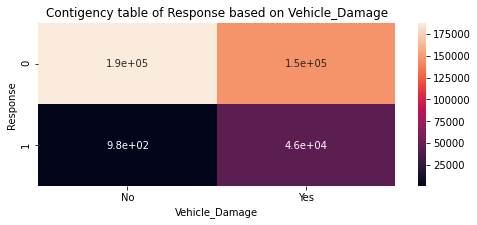

In [11]:
fig = plt.figure(figsize=(8,3))
plt.title('Contigency table of Response based on Vehicle_Damage')
sns.heatmap(contigency_pct, annot=True)
plt.show()

In [28]:
label = data.groupby('Vehicle_Damage')['Response'].sum().index.get_level_values(0).tolist()
totals = data.groupby('Vehicle_Damage')['Response'].count().reset_index().Response.values.tolist()
sizes = data.groupby('Vehicle_Damage')['Response'].sum().reset_index().Response.values.tolist()
sizes_pct = [size/total*100 for size, total in zip(sizes, totals)]
label_fmt = [f'{label} = {size_pct:.2f}%' for label, size_pct in zip(label, sizes_pct)]
color = ['green', 'blue']

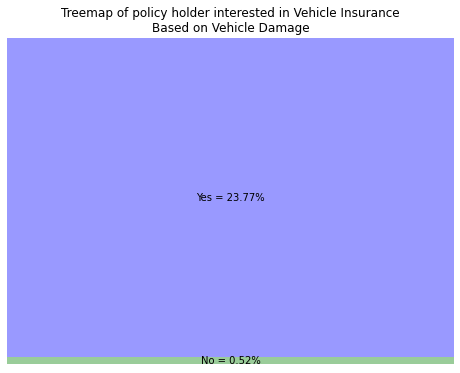

In [40]:
fig, ax = plt.subplots(1, figsize=(8, 6))

squarify.plot(sizes=sizes_pct, label=label_fmt, color=color, alpha=.4, pad=False)
plt.axis('off')
plt.title('Treemap of policy holder interested in Vehicle Insurance\nBased on Vehicle Damage', fontsize=12)
fig.savefig('plots/response_vehicle_dam.jpg', dpi=80)
plt.show()